In [1]:
#! py -m pip install seaborn
#! py -m pip install sklearn

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
# from IPython.display import display

pd.plotting.register_matplotlib_converters()

df = pd.read_csv(r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Filling Age column NaNs with age mean 

In [4]:
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Filling Embarked column Nans with random values

In [5]:
df['Embarked'].isnull().sum()

2

In [6]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].sample().iloc[0])

In [7]:
df['Embarked'].isnull().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Dropping cabin column due to insuficient number of data

In [9]:
df = df.drop(['Cabin'], axis=1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Encoding Sex column (0-female, 1-male)

In [10]:
df['Sex'] = np.where(df['Sex'] == 'male', 1, 0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


#### Encoding Embarked column (1- S (Southampton), 2 - C (Cherbourg), 3- Q (Queenstown))

In [11]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",1,32.000000,0,0,370376,7.75,Q


In [13]:
df['Embarked'] = np.where(df['Embarked'] == 'S', 1, (np.where(df['Embarked'] == 'C', 2, 3 )))
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.00,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.00,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.45,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.00,2
890,891,0,3,"Dooley, Mr. Patrick",1,32.000000,0,0,370376,7.75,3


#### Dropping Name column and Ticket (number) column as they seem irrelavant to constructing a model 

In [14]:
df = df.drop(['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


### Exploratory Data Analisys

#### Searching for corelations 

In [15]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.116569
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,-0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

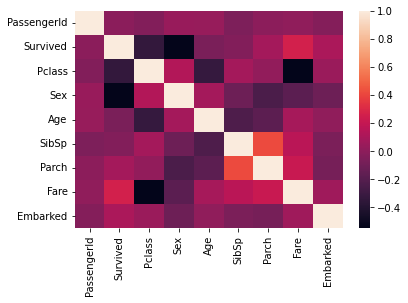

In [16]:
sns.heatmap(corr)

In [17]:
classes = df['Pclass'].value_counts()
classes

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0, 0.5, 'Number of passangers')

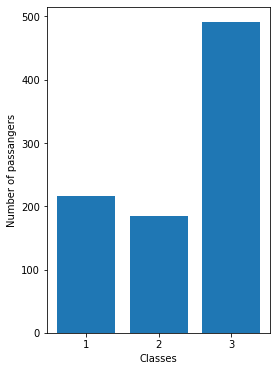

In [18]:
fig, ax  = plt.subplots(figsize=[4,6])

ax.bar(classes.index, classes, tick_label = classes.index)
plt.xlabel('Classes')
plt.ylabel('Number of passangers')

#### Counting survived passangers with division by class

##### By function:

In [19]:
def survived_by_class(df):
    
    survived_first_class = 0 
    survived_second_class = 0
    survived_third_class = 0
    
    for ind in df.index:
        if df['Survived'][ind] == 1:
            
            if df['Pclass'][ind] == 1:
                survived_first_class += 1
            
            elif df['Pclass'][ind] == 2:
                survived_second_class += 1
            
            elif df['Pclass'][ind] == 3:
                survived_third_class += 1
            
            else:
                pass
        else:
            pass
    
    return [survived_first_class, survived_second_class, survived_third_class]

In [20]:
survived_by_class= survived_by_class(df)
survived_by_class

[136, 87, 119]

##### By sum of elements:

In [21]:
survived_first_class = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 1), 'Survived'].sum() 
survived_second_class = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 2), 'Survived'].sum()
survived_third_class = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 3), 'Survived'].sum()
survived_by_class_list = [survived_first_class, survived_second_class, survived_third_class]
survived_by_class_list

[136, 87, 119]

#### Survival rate by class

In [22]:
rate_1 = (survived_by_class_list[0])/(df['Pclass'].value_counts()[1])
rate_2 = (survived_by_class_list[1])/(df['Pclass'].value_counts()[2])
rate_3 = (survived_by_class_list[2])/(df['Pclass'].value_counts()[3])
surv_rates_class = [rate_1, rate_2, rate_3]
surv_rates_class

[0.6296296296296297, 0.47282608695652173, 0.24236252545824846]

Text(0.5, 1.0, 'Survival rate by classes')

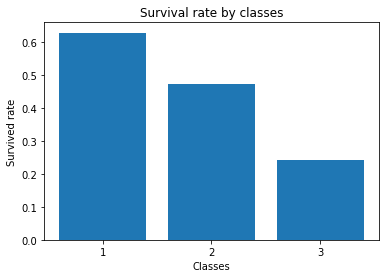

In [23]:
classes = df['Pclass'].value_counts()

fig, ax = plt.subplots()
ax.bar(classes.index.sort_values(), surv_rates_class, tick_label = classes.index.sort_values())

plt.xlabel("Classes")
plt.ylabel("Survived rate")
plt.title("Survival rate by classes")

### Training a model 

#### Prepearing training and testing sets

In [24]:
from sklearn.model_selection import train_test_split

y = df.pop('Survived')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#### Logistic Regression model

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', C=0.01, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [27]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

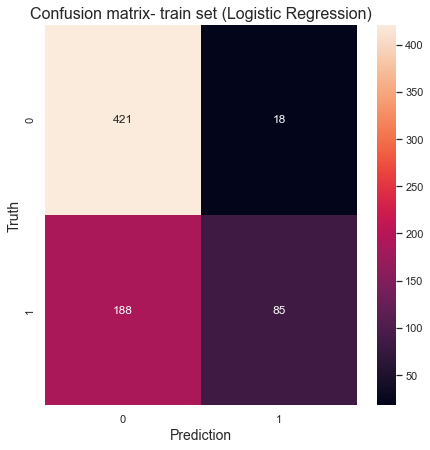

In [54]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

sns.set(rc ={'figure.figsize':(7,7)})
cm_train = confusion_matrix(y_train, y_pred_train)

ax = sns.heatmap(cm_train, annot=True, fmt='d')

label_font_size = 14

plt.xlabel('Prediction', fontsize=label_font_size)
plt.ylabel('Truth', fontsize=label_font_size)
plt.title('Confusion matrix- train set (Logistic Regression)', fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:
# print_results(calculate_metrics(y_train, y_pred_train, average='weighted'), classifier_id="LR C=0.001 TRAIN SET")
# print_results(calculate_metrics(y_test, y_pred, average='weighted'), classifier_id="LR C=0.001 TEST SET")